In [2]:
!pip install wordcloud

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

In [4]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_colwidth', None) # So we can see full text

In [7]:
# Load the dataset
df = pd.read_excel('C:/Users/LENOVO/Documents/DBA AIML datasets/Dataset for Capstone_final.xlsx', sheet_name='Sheet1')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (57, 6)


,Major_Classification,Condition,Symptoms_Common,Symptoms_Less_Common,Diagnostic_Methods,Asymptomatic (may or may not be)
0,Arrhythmias and conduction disorders,Arrhythmias,"Palpitations, dyspnea, chest discomfort, syncope, presyncope, cardiac arrest",Polyuria,"ECG, Holter, event, other monitors",Yes
1,Specific cardiac arrhythmias,Atrial fibrillation,"Palpitations, chest discomfort, symptoms of heart failure, weakness, light-headedness, dyspnea",Symptoms of acute stroke,"ECG, echocardiography, thyroid function tests","Yes, heart failure, acute stroke, other organ damage"
2,Specific cardiac arrhythmias,Atrial flutter,"Palpitations, symptoms of hemodynamic compromise, chest discomfort, dyspnea, weakness, syncope, flutter α waves",NaN,ECG,Yes
3,Specific cardiac arrhythmias,Reentrant (Paroxysmal) Supreventricular Tachycardias (PSVT),"Sudden offset & onset, rapid, regular palpitations, symptoms of hemodynamic compromise, dyspnea, chest discomfort, light-headedness, attacks lasts for few seconds or rarely, persists for > 12 hours, episodic breathlessness in infants, lethargy, feeding problems, rapid precordial pulsations, heart failure for polonged tachycardia, Symptoms of hemodynamic compromise",NaN,ECG,NaN
4,Specific cardiac arrhythmias,Sick Sinus Syndrome,"All symptoms of bradycardia, for brady-tachy variant, all symptoms of tachycardia, syncope",NaN,"ECG, measurement of TSH, ambulatory ECG monitor, Exercise tolerance testing, rarely implantable cardiac monitoring or catheter electrophysiologic study",Yes


In [11]:
# Data cleaning
# 1. Make a copy of the dataframe
df_clean = df.copy()

# 2. Forward-fill the 'Major_Classification' column
df_clean['Major_Classification'] = df_clean['Major_Classification'].ffill()

# 3. Fill NaN values in specific columns with 'Not Specified'
columns_to_fill = ['Symptoms_Less_Common', 'Asymptomatic (may or may not be)']
df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna('Not Specified')

# 4. Clean column names (remove spaces, parentheses, special characters)
df_clean.columns = df_clean.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('_may_or_may_not_be', '')

# 5. Display info to confirm changes
print(df_clean.info())
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Major_Classification  57 non-null     object
 1   Condition             57 non-null     object
 2   Symptoms_Common       55 non-null     object
 3   Symptoms_Less_Common  57 non-null     object
 4   Diagnostic_Methods    57 non-null     object
 5   Asymptomatic          57 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB
None

Missing values after cleaning:
Major_Classification    0
Condition               0
Symptoms_Common         2
Symptoms_Less_Common    0
Diagnostic_Methods      0
Asymptomatic            0
dtype: int64


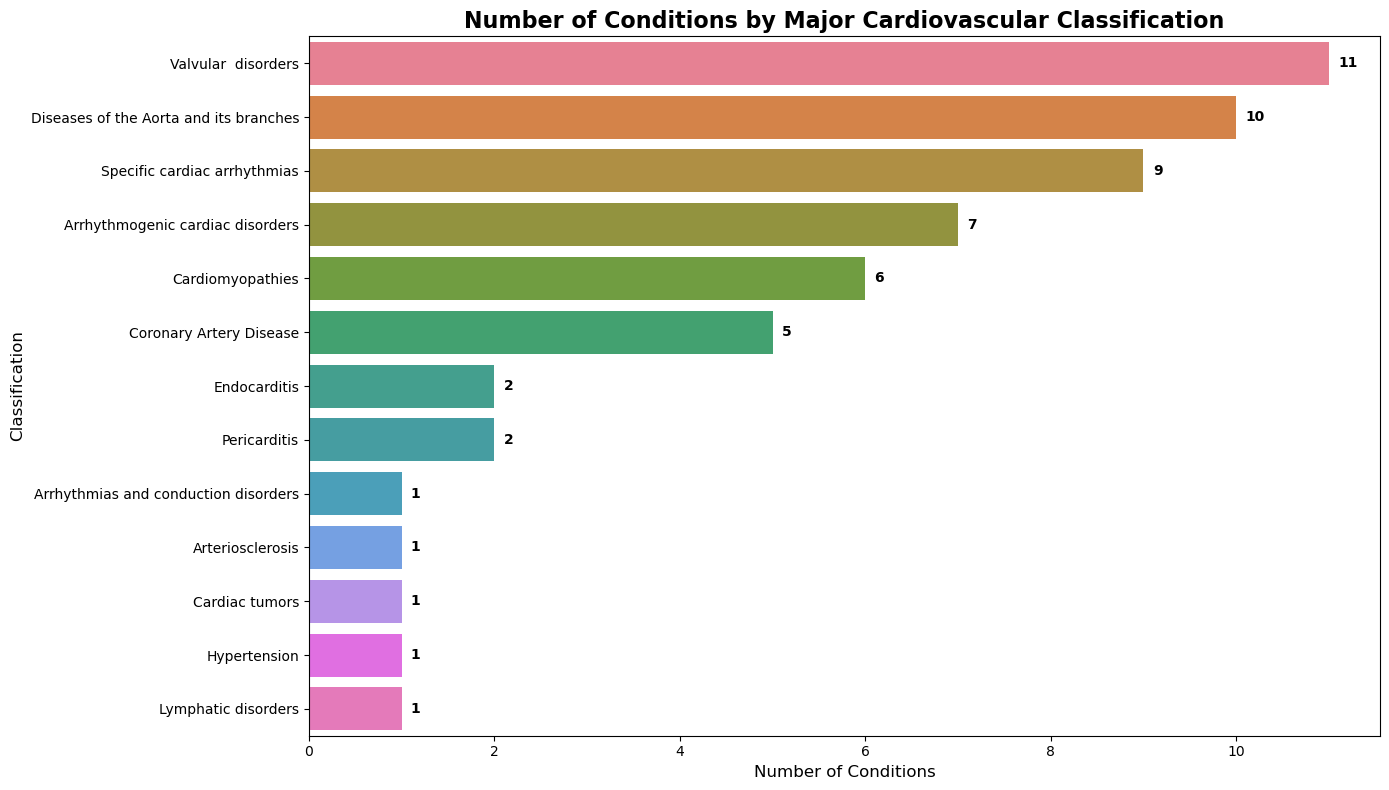

In [12]:
# Exploratory Data Analysis and Interpretation
# Count conditions by major classification
plt.figure(figsize=(14, 8))
classification_counts = df_clean['Major_Classification'].value_counts()
ax = sns.barplot(x=classification_counts.values, y=classification_counts.index, hue=classification_counts.index, legend=False, dodge=False)
plt.title('Number of Conditions by Major Cardiovascular Classification', fontsize=16, fontweight='bold')
plt.xlabel('Number of Conditions', fontsize=12)
plt.ylabel('Classification', fontsize=12)

# Add value labels on the bars
for i, v in enumerate(classification_counts.values):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
# Creating wordcloud of common symptoms
# Combine all text from common symptoms
text = " ".join(symptom for symptom in df_clean['Symptoms_Common'])

# Create and generate a word cloud image
stopwords = set(STOPWORDS)
# Add common medical stopwords
stopwords.update(["symptoms", "symptom", "may", "include", "common", "include", "eg", "cause", "causes", "pain", "discomfort"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Common Symptoms in Cardiovascular Disorders', fontsize=16, fontweight='bold')
plt.show()

TypeError: sequence item 32: expected str instance, float found

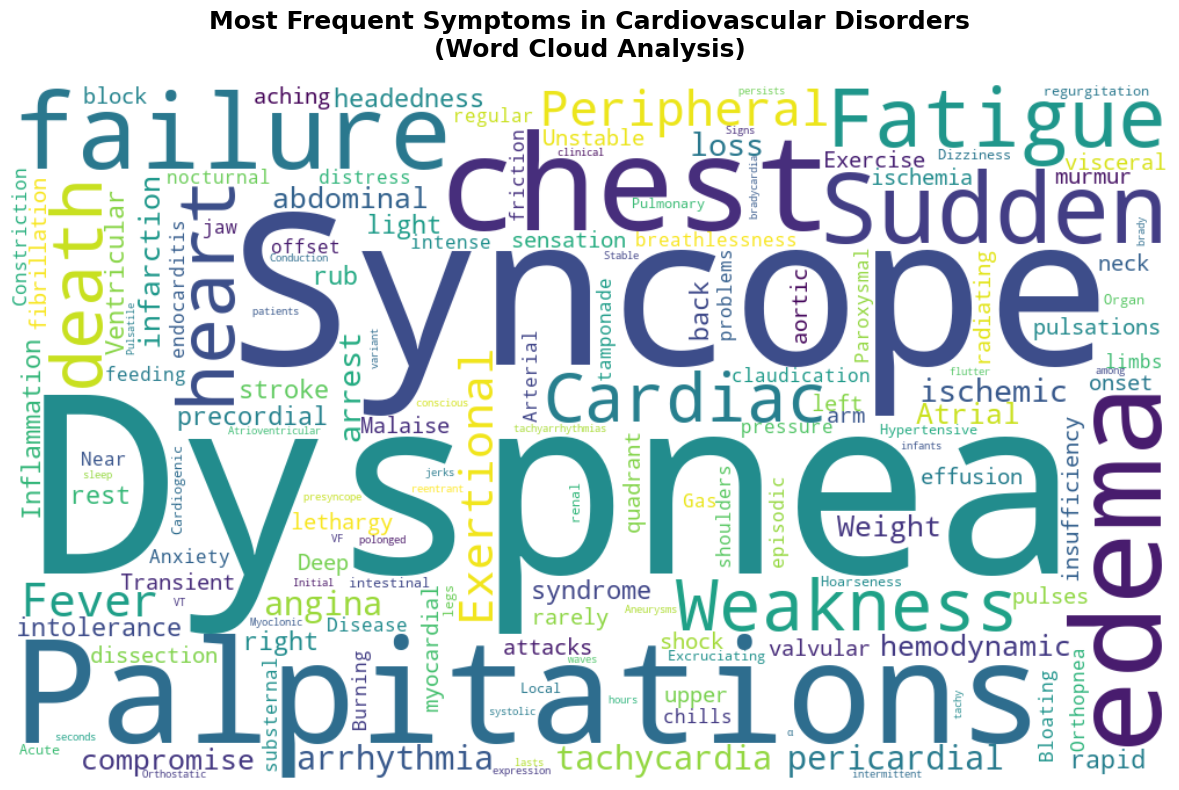

In [16]:
# Enhanced word cloud with better styling
text = " ".join(str(symptom) for symptom in df_clean['Symptoms_Common'] if pd.notna(symptom))

stopwords = set(STOPWORDS)
medical_stopwords = ['symptoms', 'symptom', 'may', 'include', 'common', 'eg', 
                    'cause', 'causes', 'pain', 'discomfort', 'usually', 'often',
                    'sometimes', 'typically', 'manifest', 'manifestation']
stopwords.update(medical_stopwords)

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=150,
    width=1000,
    height=600,
    colormap='viridis',
    collocations=False  # Don't consider word combinations
).generate(text)

plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Symptoms in Cardiovascular Disorders\n(Word Cloud Analysis)', 
          fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

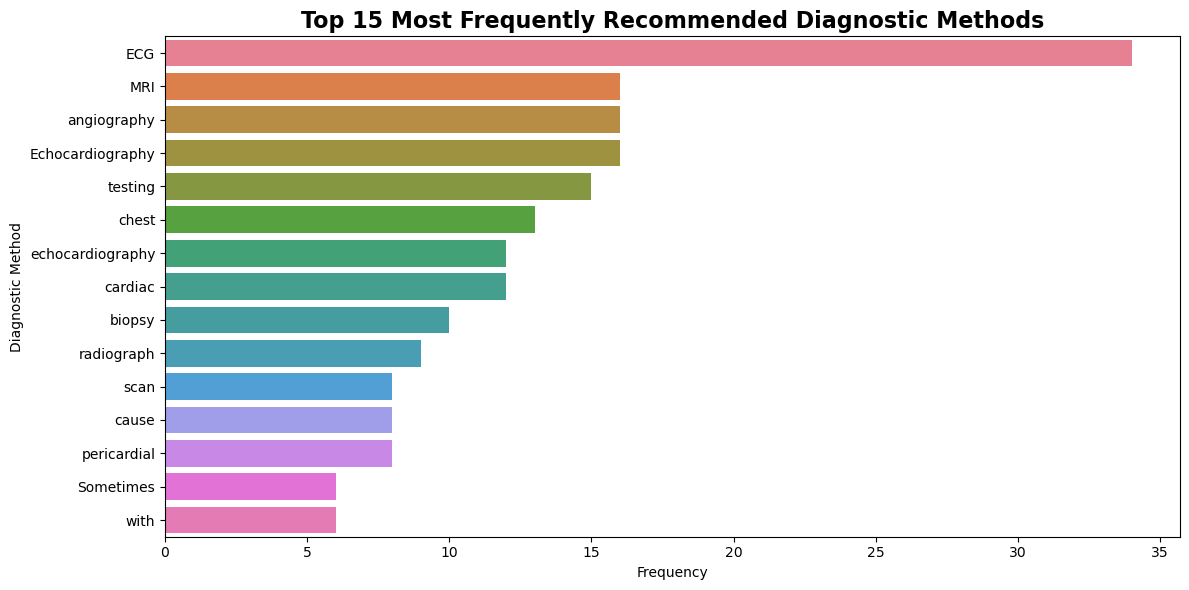

In [17]:
# Split the diagnostic methods strings and count occurrences
all_diagnostics = []
for methods in df_clean['Diagnostic_Methods']:
    # Simple split by comma; a more advanced NLP approach could be used later
    split_methods = re.split(',| |;', methods) 
    for method in split_methods:
        method_clean = method.strip()
        if method_clean and len(method_clean) > 2: # Filter out small words/artifacts
            all_diagnostics.append(method_clean)

# Count and get top 10
diagnostic_counts = Counter(all_diagnostics).most_common(15)

# Plot
methods, counts = zip(*diagnostic_counts)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(counts), y=list(methods), hue=list(methods), legend=False, dodge=False)
plt.title('Top 15 Most Frequently Recommended Diagnostic Methods', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Diagnostic Method')
plt.tight_layout()
plt.show()

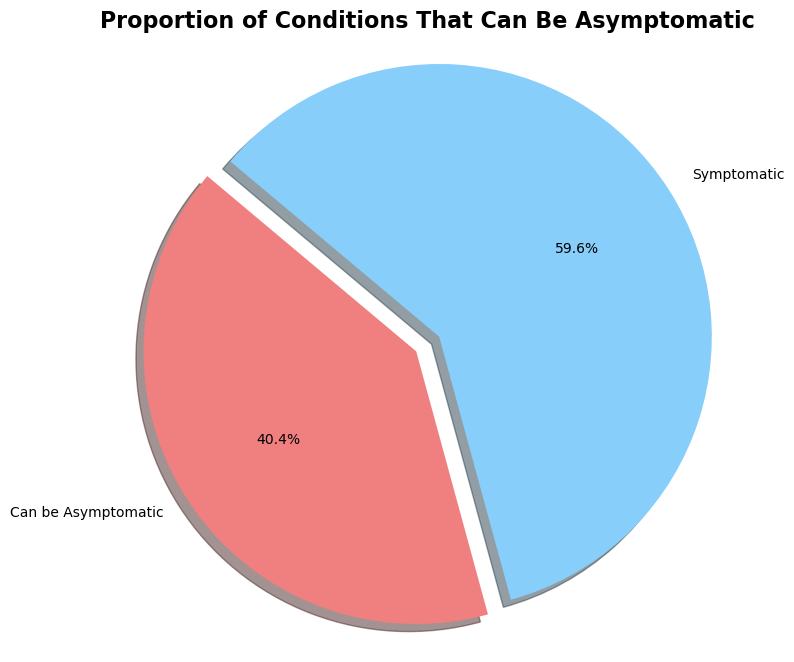

In [18]:
# Count asymptomatic conditions
asx_count = df_clean[df_clean['Asymptomatic'].str.contains('Yes', case=False, na=False)].shape[0]
non_asx_count = df_clean.shape[0] - asx_count

labels = ['Can be Asymptomatic', 'Symptomatic']
sizes = [asx_count, non_asx_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proportion of Conditions That Can Be Asymptomatic', fontsize=16, fontweight='bold')
plt.show()

In [19]:
# Example of how a power calculation might look (for context, not primary justification)
from statsmodels.stats.power import TTestIndPower, NormalIndPower

# Parameters for power analysis
effect_size = 0.2
alpha = 0.05
power = 0.8

# Perform power analysis for a t-test
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print(f'Required sample size per group for a t-test: {result:.0f}')

# For a test of proportions (e.g., proportion of conditions with a specific symptom)
analysis_prop = NormalIndPower()
result_prop = analysis_prop.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print(f'Required sample size per group for a proportion test: {result_prop:.0f}')
# Output: Required sample size per group for a t-test: 393
# Output: Required sample size per group for a proportion test: 393

Required sample size per group for a t-test: 393
Required sample size per group for a proportion test: 392


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. FEATURE ENGINEERING: Create the primary feature 'All_Symptoms'
df['All_Symptoms'] = df['Symptoms_Common'] + " " + df['Symptoms_Less_Common']
df['All_Symptoms'] = df['All_Symptoms'].fillna('') # Handle missing values

# 2. FEATURE ENGINEERING: One-Hot Encoding
# First, we need to split the combined string into a list of unique symptoms
def extract_symptoms(symptom_text):
    """Convert a string of symptoms into a cleaned list of unique symptoms."""
    if pd.isna(symptom_text):
        return []
    # Split by commas and strip whitespace
    symptoms_list = [s.strip().lower() for s in str(symptom_text).split(',')]
    # Remove duplicates and empty strings
    return list(set([s for s in symptoms_list if s]))

# Apply the function to create a new column of symptom lists
df['Symptom_List'] = df['All_Symptoms'].apply(extract_symptoms)

# Use MultiLabelBinarizer to create the one-hot encoded matrix
mlb = MultiLabelBinarizer()
symptom_matrix_onehot = mlb.fit_transform(df['Symptom_List'])

# Create a DataFrame for clarity
onehot_df = pd.DataFrame(symptom_matrix_onehot, columns=mlb.classes_, index=df['Condition'])
print("Shape of One-Hot Encoded Matrix:", onehot_df.shape)
print("\nFirst 5 rows of the One-Hot Encoded DataFrame (Conditions x Symptoms):")
onehot_df.iloc[:5, :10] # Show first 5 conditions and first 10 symptoms

# 3. DEFINE THE CDSS FUNCTION using Cosine Similarity
def suggest_conditions_onehot(input_symptoms, top_n=5):
    """
    CDSS function using One-Hot Encoding.
    input_symptoms: string of comma-separated symptoms (e.g., "dyspnea, chest pain, syncope")
    top_n: number of top matches to return
    """
    # 1. Process input symptoms
    input_list = extract_symptoms(input_symptoms)
    
    # 2. Create a one-hot vector for the input query
    input_vector = mlb.transform([input_list]).astype(float) # Shape (1, n_symptoms)
    
    # 3. Calculate Cosine Similarity between input and all conditions
    similarities = cosine_similarity(input_vector, symptom_matrix_onehot).flatten()
    
    # 4. Get indices of top N most similar conditions
    top_indices = similarities.argsort()[-top_n:][::-1]
    
    # 5. Return the most relevant results
    results = df.iloc[top_indices][['Condition', 'Major_Classification', 'All_Symptoms']].copy()
    results['Similarity_Score'] = similarities[top_indices]
    return results.round(4)

# 4. TEST THE CDSS PROTOTYPE
test_symptoms = "dyspnea, chest pain, syncope"
print(f"\nQuery: '{test_symptoms}'\n")
print("Top Suggested Conditions using One-Hot Encoding:")
suggest_conditions_onehot(test_symptoms, top_n=3)

Shape of One-Hot Encoded Matrix: (57, 63)

First 5 rows of the One-Hot Encoded DataFrame (Conditions x Symptoms):

Query: 'dyspnea, chest pain, syncope'

Top Suggested Conditions using One-Hot Encoding:


,Condition,Major_Classification,All_Symptoms,Similarity_Score
20,Hypertrophic Cardiomyopathy,Cardiomyopathies,"Dyspnea, chest pain, palpitations and syncope (marker of increased risk of sudden death) Fatigability, Sudden death",0.5774
0,Arrhythmias,Arrhythmias and conduction disorders,"Palpitations, dyspnea, chest discomfort, syncope, presyncope, cardiac arrest Polyuria",0.4714
10,Arrhythmogenic Right Ventricular Cardiomyopathy,Arrhythmogenic cardiac disorders,"Ventricular Tachycardia (VT), Ventricular fibrillation (VF), Sudden death, Palpitations, Syncope, Atrial fibrillation, Signs of right or left ventricular systolic failure Palpitations, Syncope",0.2182


In [28]:
# SUPERIOR APPROACH: Using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Use the engineered 'All_Symptoms' feature
corpus = df['All_Symptoms'].fillna('')

# 2. FEATURE ENGINEERING: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
tfidf_matrix = tfidf.fit_transform(corpus)

# 3. DEFINE THE CDSS FUNCTION
def suggest_conditions_tfidf(input_symptoms, top_n=5):
    input_vec = tfidf.transform([input_symptoms])
    similarities = cosine_similarity(input_vec, tfidf_matrix).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    results = df.iloc[top_indices][['Condition', 'Major_Classification', 'All_Symptoms']].copy()
    results['Similarity_Score'] = similarities[top_indices]
    return results.round(4)

# 4. TEST THE SUPERIOR CDSS PROTOTYPE
print(f"\nQuery: '{test_symptoms}'\n")
print("Top Suggested Conditions using TF-IDF (Recommended Approach):")
suggest_conditions_tfidf(test_symptoms, top_n=3)


Query: 'dyspnea, chest pain, syncope'

Top Suggested Conditions using TF-IDF (Recommended Approach):


,Condition,Major_Classification,All_Symptoms,Similarity_Score
20,Hypertrophic Cardiomyopathy,Cardiomyopathies,"Dyspnea, chest pain, palpitations and syncope (marker of increased risk of sudden death) Fatigability, Sudden death",0.4283
0,Arrhythmias,Arrhythmias and conduction disorders,"Palpitations, dyspnea, chest discomfort, syncope, presyncope, cardiac arrest Polyuria",0.3915
29,Acute Myocardial Infarction (MI),Coronary Artery Disease,"Deep, substernal, radiating visceral pain, Unstable angina, Dyspnea, Fatigue, Unstable or crescendo angina, Deep substernal visceral pain (aching or pressure radiating to back, jaw, left arm, right arm, shoulders), Diaphoresis, Nausea, Vomiting, Syncope Silent MI, Atypical chest discomfort, Ischemic-type chest pain, Weakness due to LV failure, Pulmonary edema, Shock, Significant arrhythmia, Pale cool diaphoretic skin, Peripheral cyanosis, Central cyanosis, Thread-like pulse, Variable blood pressure, Distant heart sounds, Fourth heart sound, Soft systolic blowing apical murmur, Friction rub, Elevated RV filling pressure, Distended jugular veins (Kussmaul sign), Clear lung fields with hypotension",0.2833
